In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [31]:
data = pd.read_csv(r"C:\Users\KIIT\Desktop\ExcelR Data science\Assignments\EDA1\Cardiotocographic.csv")
data.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [32]:
#Summary of dataset
print(data.shape,"\n")
print(data.dtypes,"\n")
print(data.describe())

(2126, 14) 

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object 

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS      

In [33]:
# Checking and Handling missing values
#Checking for count of  missing value in each column 
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

since our dataset is related to fetal heart rate, we can safely assume that the spread of data points would be at a range with a few outliers so we can use the mean imputation to impute the missing values. 

We cannot delete the rows as there are a significant amount of data that is lost (almost 21 rows).

But before imputing we need to check outliers

In [34]:
#correlation matrix between two variables
correlation = data.corr()
correlation

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457,-0.118425,0.236864,0.131843
AC,-0.063830,1.000000,0.009433,0.072012,-0.093507,-0.033623,-0.084590,-0.231103,0.134168,-0.271390,-0.106529,0.238436,0.032481,-0.316941
FM,0.018777,0.009433,1.000000,-0.053226,0.009718,0.029901,0.121284,-0.032691,0.017055,-0.011936,-0.006237,0.097213,-0.018339,0.074054
UC,-0.166570,0.072012,-0.053226,1.000000,0.190128,-0.006937,0.070658,-0.181161,0.189406,-0.227304,-0.049460,0.107397,-0.066610,-0.185411
DL,-0.126959,-0.093507,0.009718,0.190128,1.000000,0.058625,0.145425,-0.069361,0.410102,-0.186967,-0.165750,0.410031,-0.023569,0.025427
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.242625,-0.231103,-0.032691,-0.181161,-0.069361,0.008452,0.038238,1.000000,-0.293882,0.357497,-0.220427,-0.207599,-0.010927,0.422652
MSTV,-0.170473,0.134168,0.017055,0.189406,0.410102,0.016163,0.119892,-0.293882,1.000000,-0.291935,0.028934,0.435393,-0.036857,-0.095139
ALTV,0.210728,-0.271390,-0.011936,-0.227304,-0.186967,-0.004398,-0.077758,0.357497,-0.291935,1.000000,-0.107712,-0.346460,0.036771,0.365846


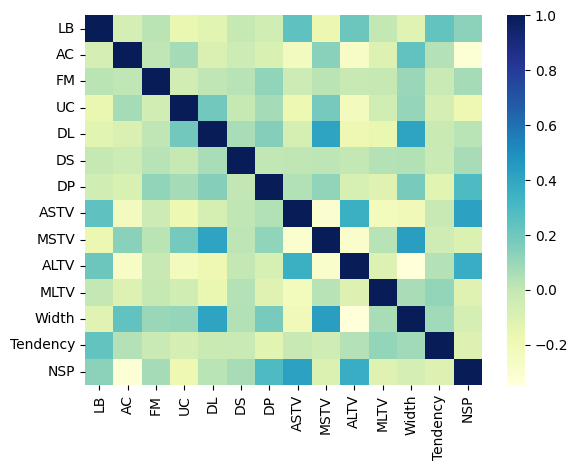

In [35]:
#Heat map to easily visualise the extent of correlation 
heatmap = sns.heatmap(correlation, cmap = 'YlGnBu')

From the above correlation heatmap we can safely assume that the datapoints are not highly correlated and we can use mean imputation 

In [36]:
#Checking for outliers
data1 = data.dropna() #calculating z score after dropping missing values as they interfere with the calculation

#1. Z- score and IQR 
from scipy.stats import zscore
z_score = data1.select_dtypes(include= ['float64','int64']).apply(zscore)

#printing data if the z- score value is > 3
outlier = (z_score.abs() > 3)
print(outlier.sum())

LB          10
AC          17
FM          39
UC          11
DL          33
DS          16
DP          39
ASTV        10
MSTV        25
ALTV        36
MLTV        17
Width       10
Tendency    10
NSP         10
dtype: int64


In [37]:
#using mean imputation to impute the dataset 
data_imputed = data.fillna(data.mean())

<h1> Statistical Summary </h1>

In [38]:
data_summary = pd.DataFrame({
    "Mean": data_imputed.mean(), 
    "Median": data_imputed.median(), 
    "Standatd deviation": data_imputed.std(), 
    "IQR": data_imputed.quantile(0.75) - data_imputed.quantile(0.25), 
    "Min": data.min(), 
    "Max": data.max()
})

In [39]:
data_summary

,Mean,Median,Standatd deviation,IQR,Min,Max
LB,133.343598,133.000000,11.214328,14.000000,51.842487,214.000000
AC,0.003219,0.001668,0.004370,0.005606,-0.019284,0.038567
FM,0.009894,0.000000,0.067540,0.002567,-0.480634,0.961268
UC,0.004391,0.004484,0.003340,0.004685,-0.014925,0.030002
DL,0.001895,0.000000,0.003343,0.003289,-0.015393,0.030769
DS,0.000003,0.000000,0.000141,0.000000,-0.001353,0.002706
DP,0.000175,0.000000,0.000836,0.000000,-0.005348,0.010695
ASTV,46.995984,49.000000,18.813973,29.000000,-63.000000,162.000000
MSTV,1.364378,1.200000,1.173632,1.000000,-6.600000,13.800000
ALTV,10.285964,0.000000,21.205041,11.000000,-91.000000,182.000000


<h2> Intrepretations</h2>

 <h3>1. High Variability </h3>
Variables with high variability (standard deviation greater than half the mean) include:

__AC, FM, UC, DL, DS, DP, MSTV, ALTV, MLTV, Width, Tendency__
These variables show significant fluctuations and may require closer examination for patterns or anomalies.

<h3>2. Outliers </h3>
Variables with potential outliers (minimum or maximum values far from the mean by more than three standard deviations) are:

__LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP__

This suggests extreme values in these variables that could impact analysis or modeling.

<h3>3. Skewed Distributions</h3>

Variables where the mean differs significantly from the median indicate skewed distributions:

__LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP__

These variables may not follow a normal distribution and could benefit from transformations (e.g., logarithmic or square root) for statistical modeling.

<h3>4. Zero or Near-Zero Median</h3>
Variables with a median of zero:

__FM, DL, DS, DP, ALTV, Tendency__
These variables have a central tendency around zero and might represent sparse or rare events.

<h3>5. Specific Observations</h3>

**LB (Baseline Fetal Heart Rate):**  The range (51.84 to 214) is wide but has a relatively small standard deviation (11.21), indicating consistent values around the mean.

**ASTV (Percentage of Accelerations):** Shows notable variability (standard deviation: 18.81) and a wide range from -63 to 162.

**ALTV and MLTV (Long-Term and Medium-Term Variability):** Both exhibit high variability and extreme ranges (-91 to 182 for ALTV and -50.7 to 101.4 for MLTV).

**Width:** The range (-174 to 357) indicates significant spread in this variable.
**NSP (Fetal State):** The range (-1.03 to 5) suggests possible outliers or misclassifications.

<h1>Visualisations</h1>

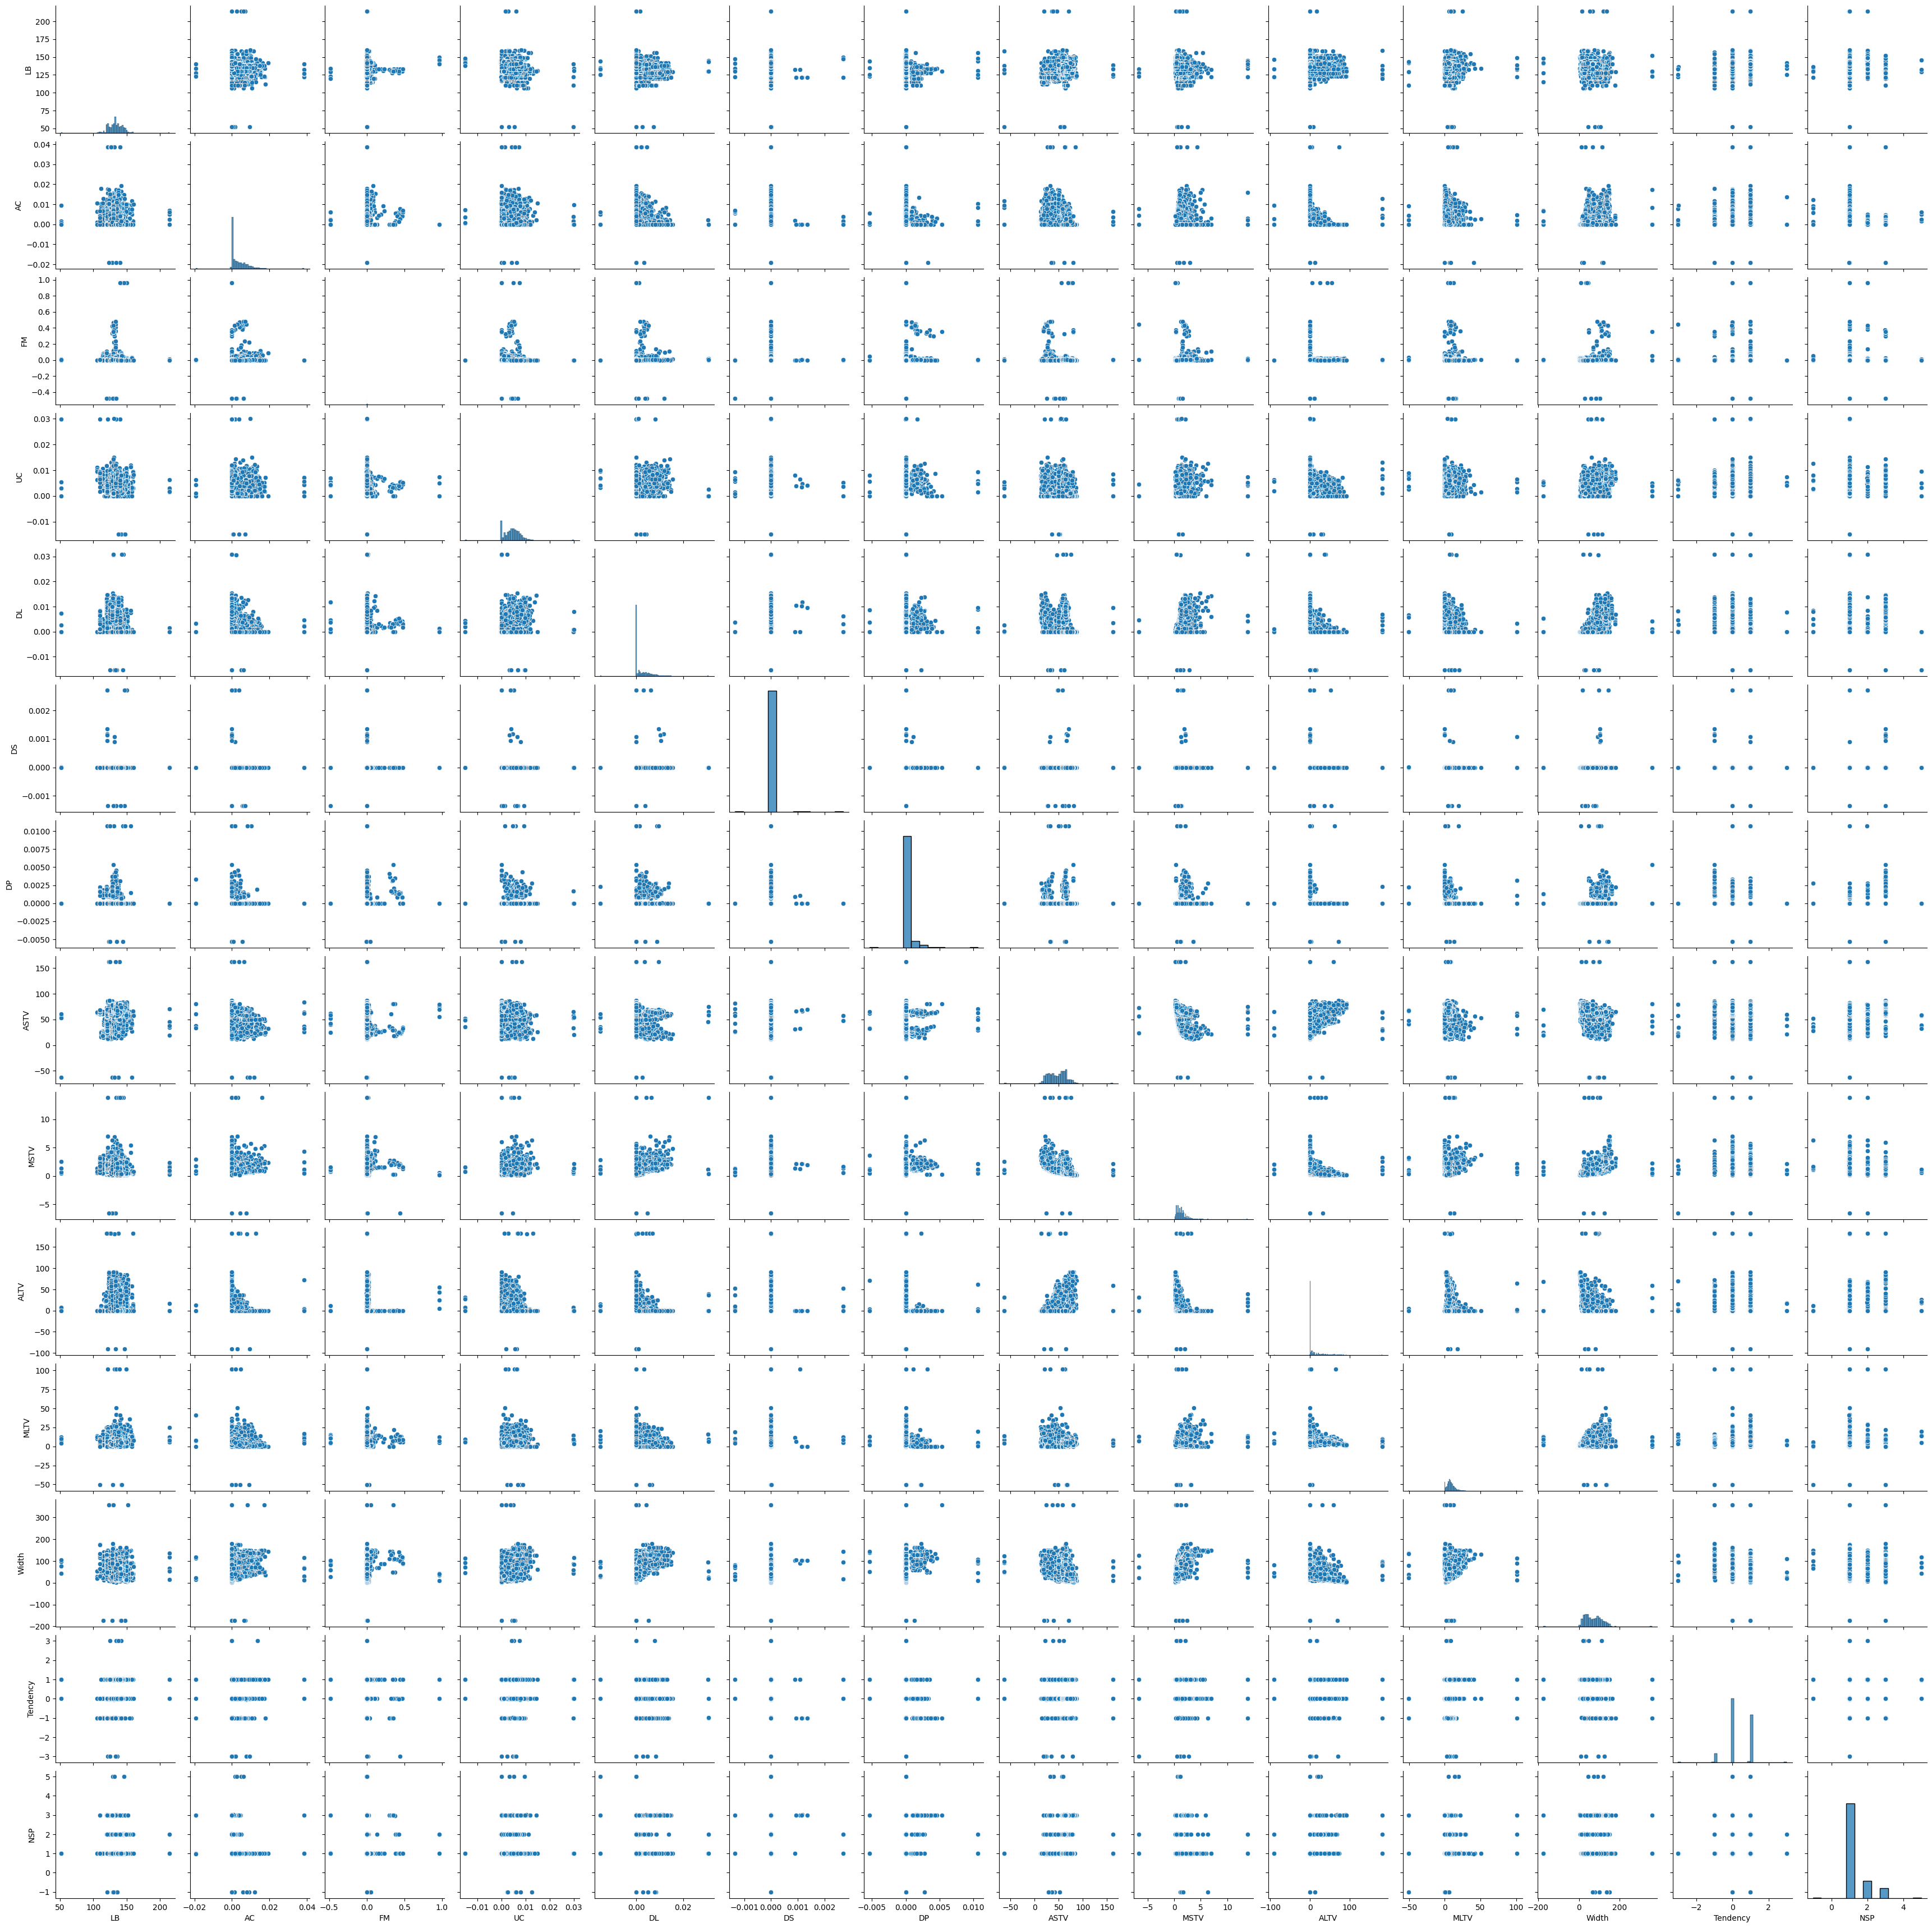

In [40]:
sns.pairplot(data)

<h2>Histogram visualisations to find out distribution of variables</h2>

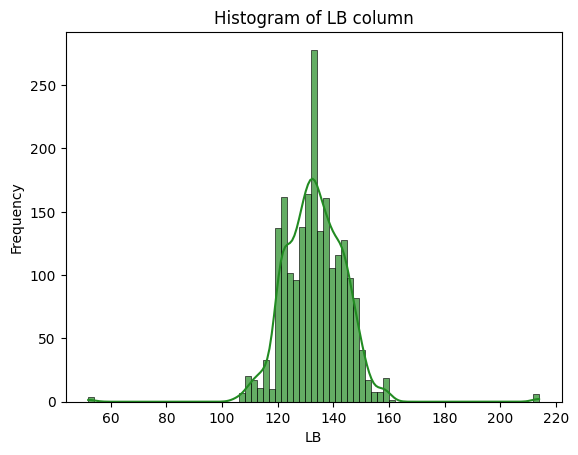

In [41]:
sns.histplot(data = data, x ="LB", kde = True, color= "forestgreen", alpha= 0.7)
plt.title("Histogram of LB column")
plt.xlabel("LB")
plt.ylabel("Frequency")
plt.show()

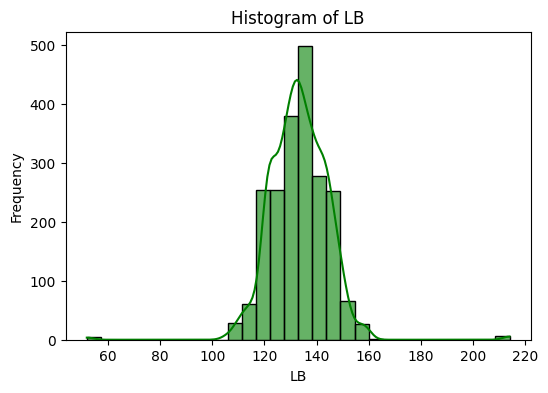

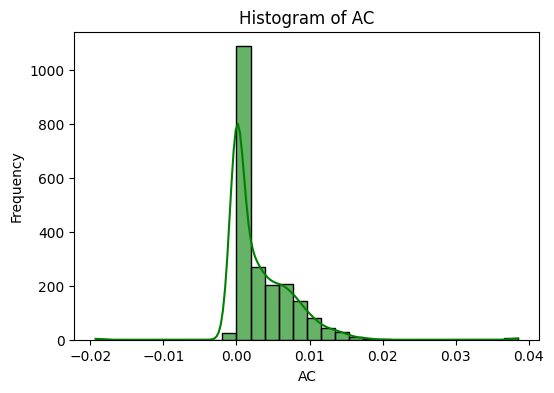

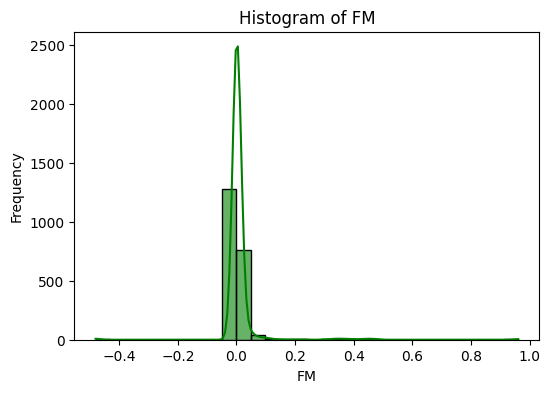

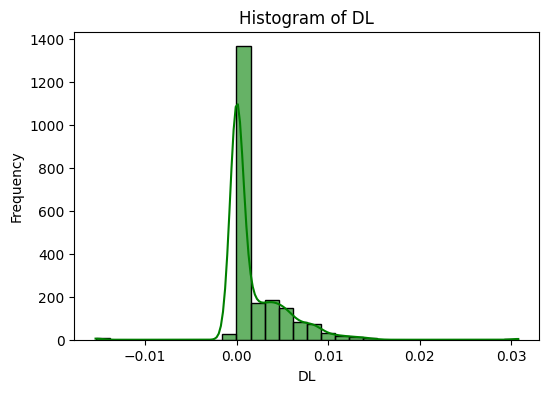

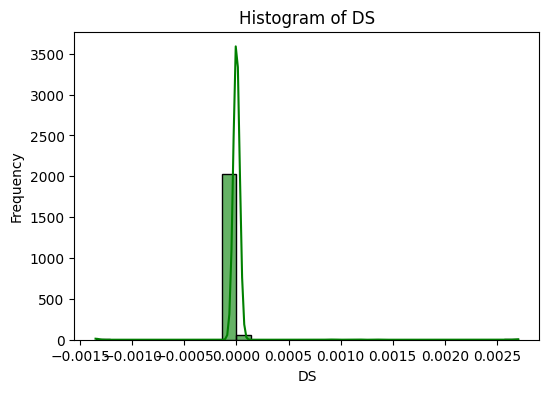

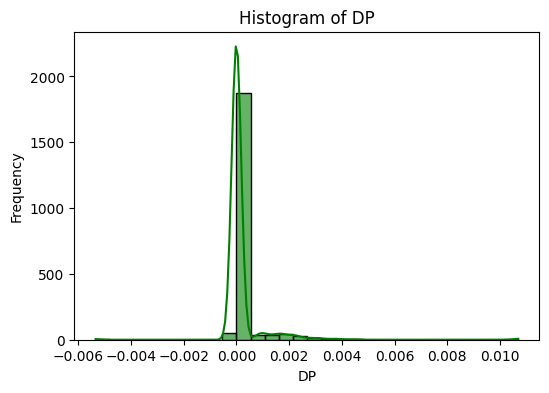

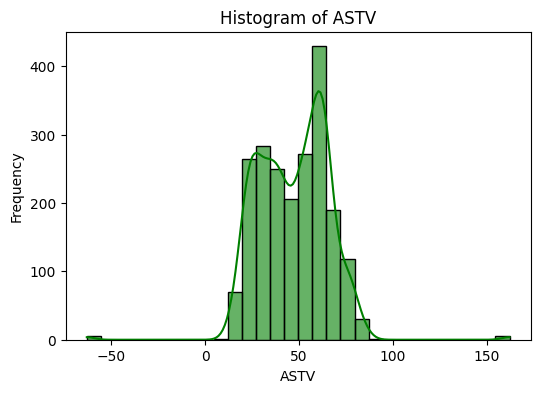

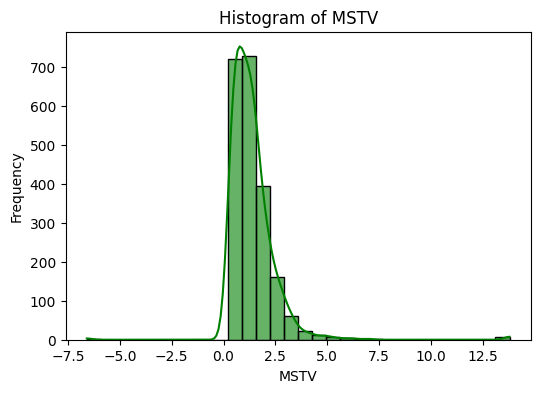

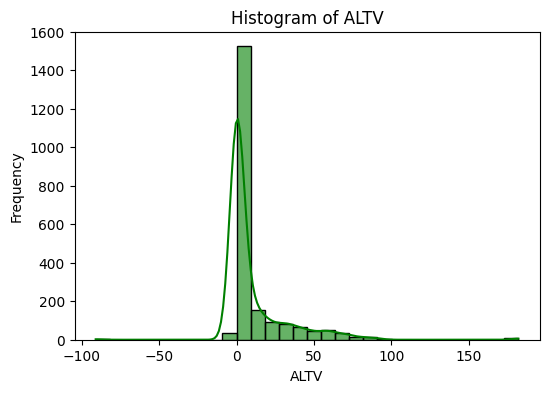

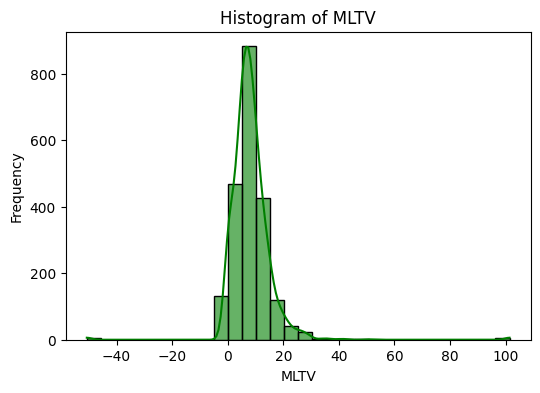

In [42]:
columns = ['LB', 'AC', 'FM', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']

for i in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data = data, x = i, bins = 30, kde = True, color= "green", alpha = 0.6)
    plt.title(f"Histogram of {i}")
    plt.xlabel(f"{i}")
    plt.ylabel("Frequency")
    plt.show()

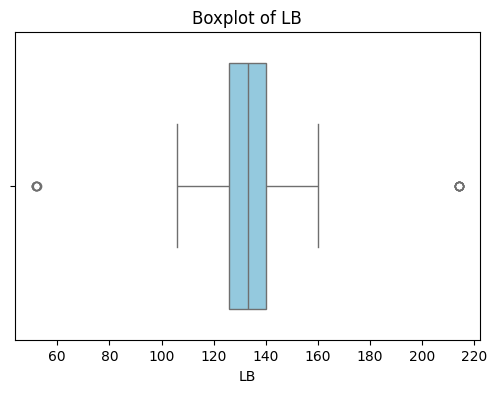

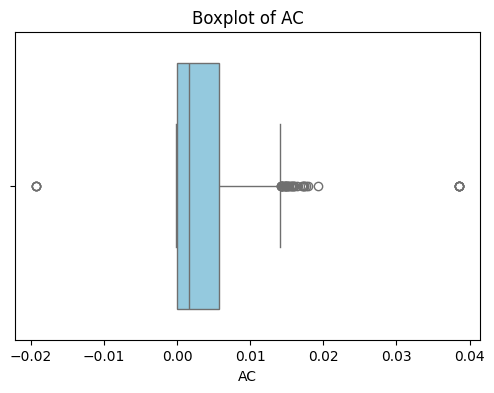

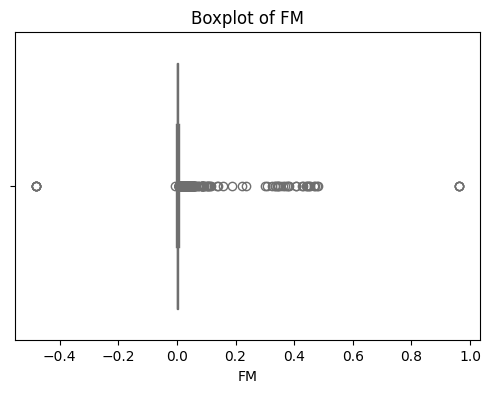

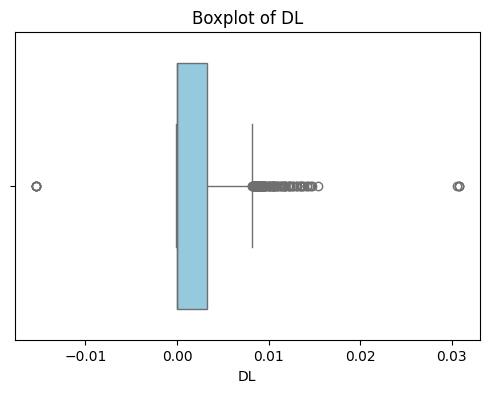

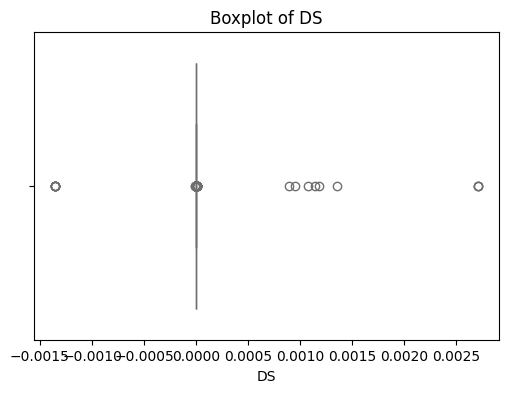

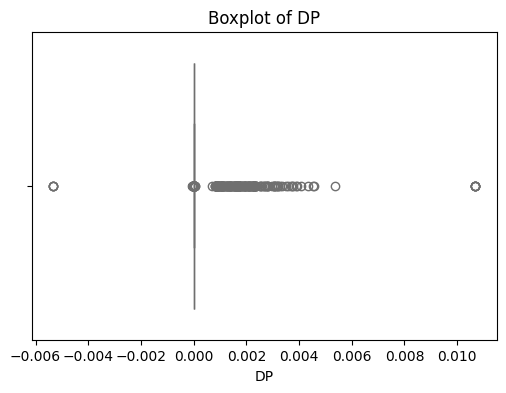

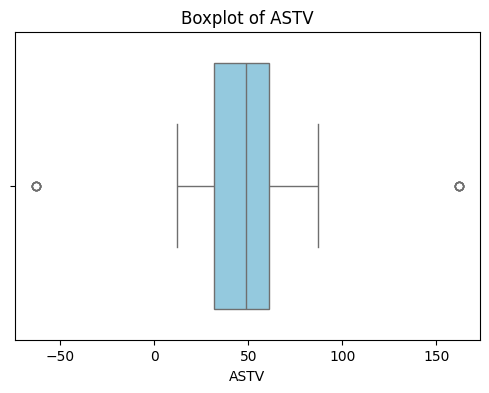

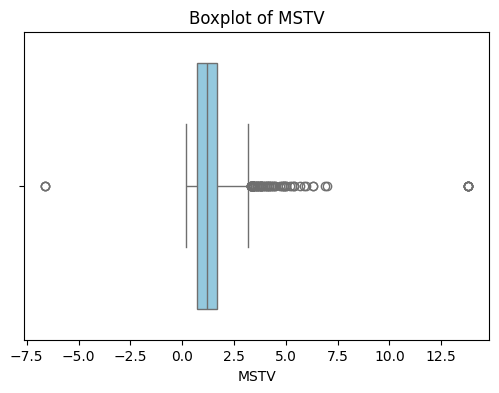

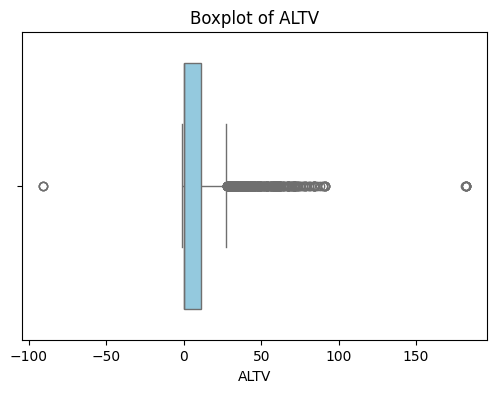

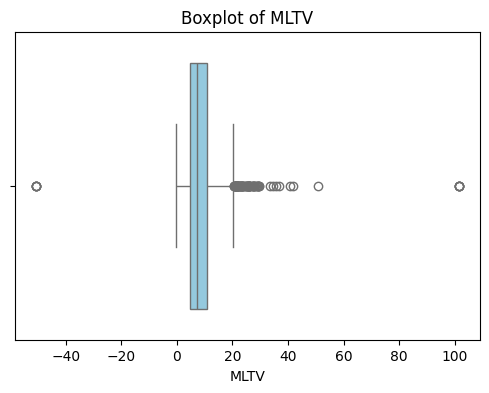

In [43]:
for i in columns: 
    plt.figure(figsize=(6,4))
    sns.boxplot(data = data, x = i, color = "skyblue" )
    plt.title(f"Boxplot of {i}")
    plt.xlabel(f"{i}")
    plt.show()

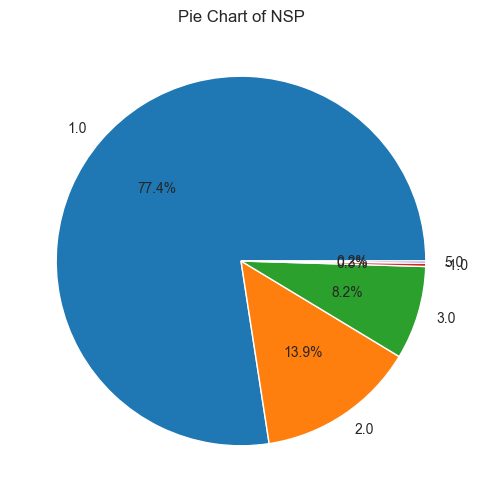

In [54]:
#Pie chart to visualize categorical variable

nsp_counts = data['NSP'].round().value_counts()
sns.set_style("ticks")
plt.figure(figsize=(6, 6))
plt.pie(nsp_counts, labels=nsp_counts.index, autopct='%1.1f%%')
plt.title("Pie Chart of NSP")
plt.show()

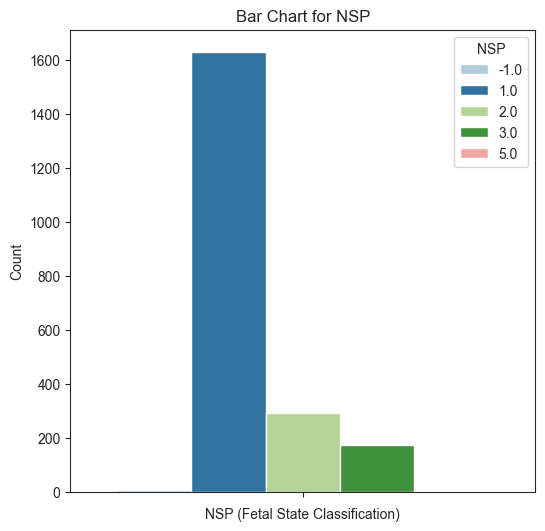

In [75]:
#Bar chart to visualise categorical variables

nsp_counts_df = nsp_counts.reset_index()
nsp_counts_df.columns = ['NSP', 'Count']

plt.figure(figsize=(6, 6))
sns.barplot(hue='NSP', y='Count', data=nsp_counts_df ,palette="Paired")
plt.title("Bar Chart for NSP")
plt.xlabel("NSP (Fetal State Classification)")
plt.ylabel("Count")
plt.show()

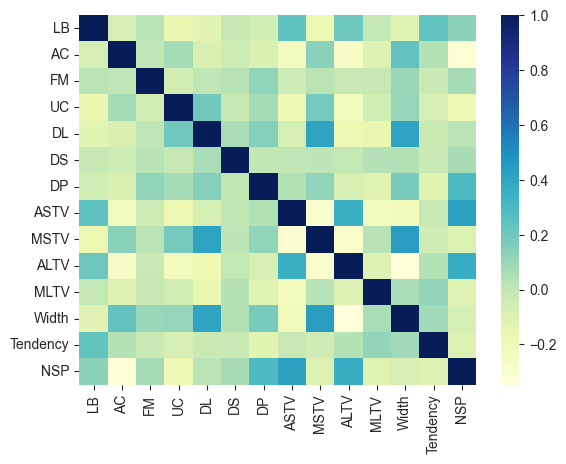

In [59]:
#Heatmap to understand cocorrelation
heatmap = sns.heatmap(correlation, cmap = 'YlGnBu')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


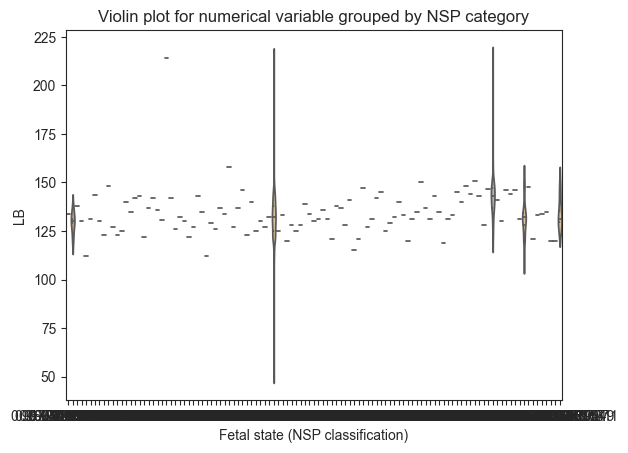

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


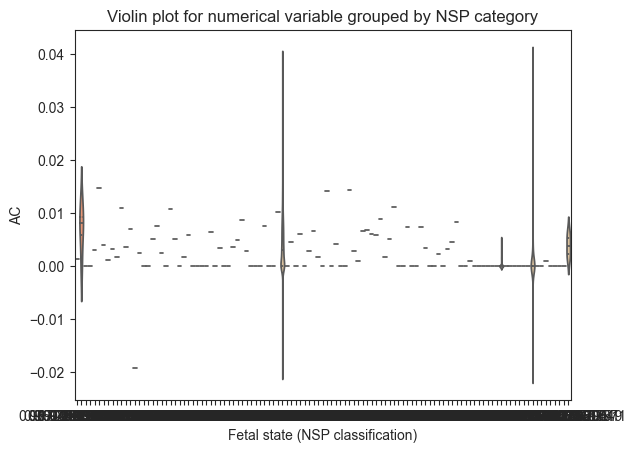

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


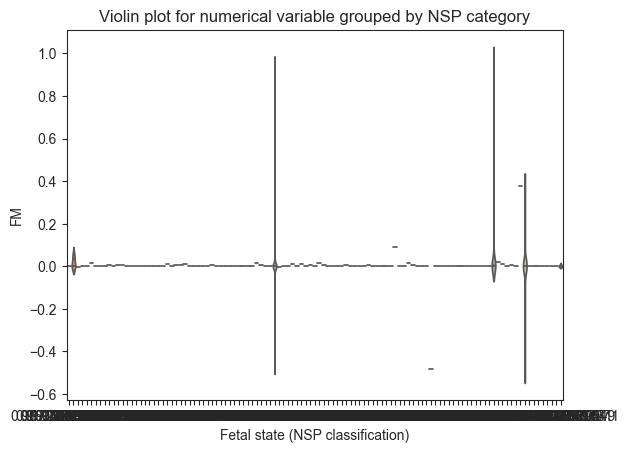

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


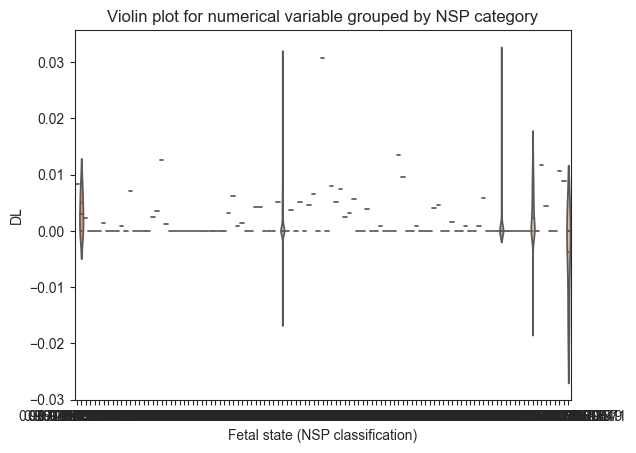

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


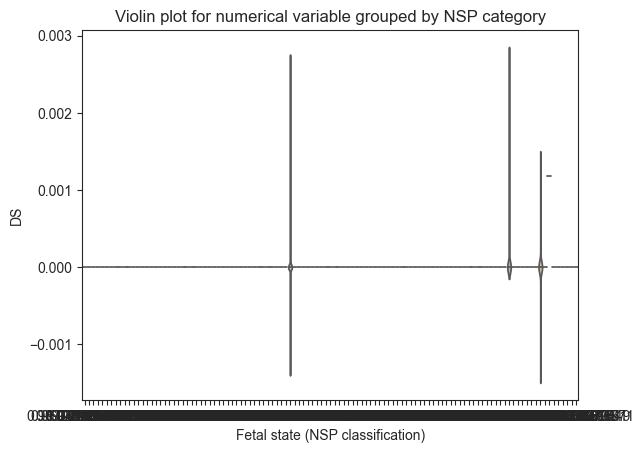

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


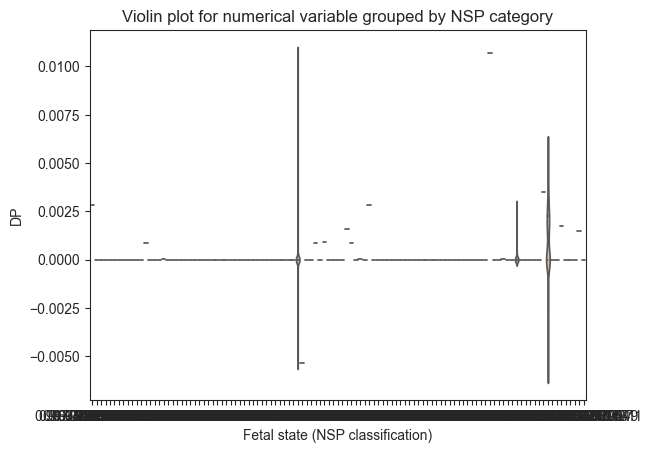

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


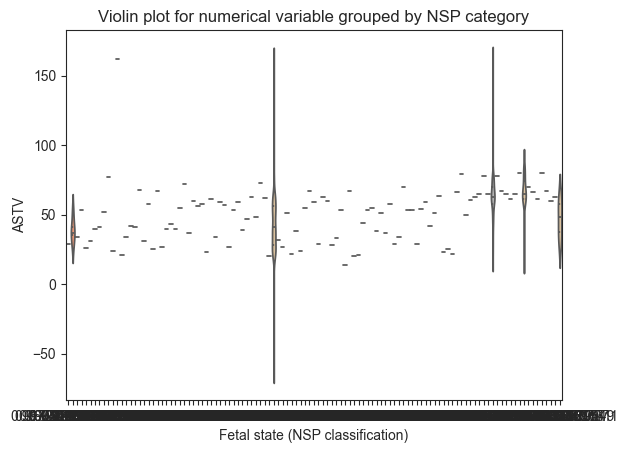

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


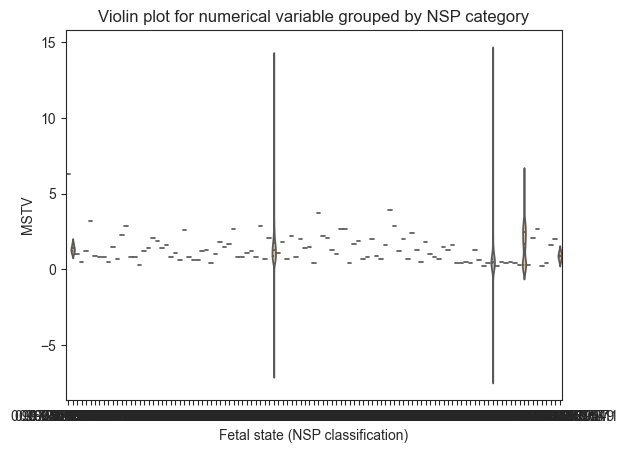

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


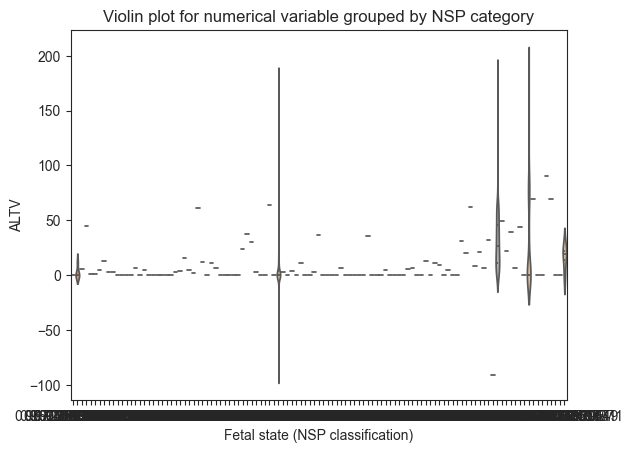

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18544\927315174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")


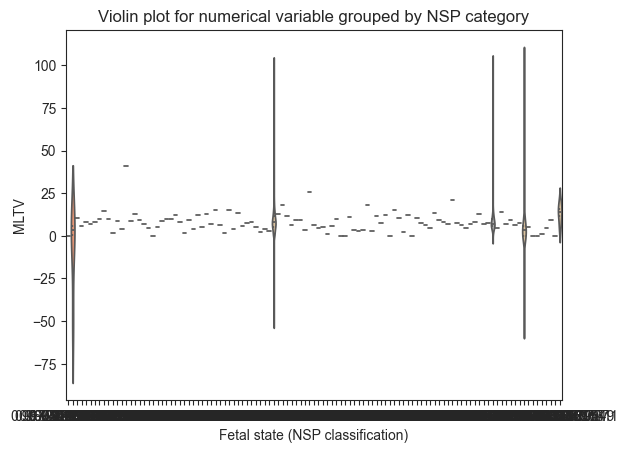

In [81]:
#Violin plot for all numerical variables with 'NSP' category
data['NSP'] = data["NSP"].astype('category')

for i in columns:
    sns.violinplot(x = 'NSP', y = i, data= data , palette= 'Set2', inner= "quartile")
    plt.title("Violin plot for numerical variable grouped by NSP category")
    plt.xlabel("Fetal state (NSP classification)")
    plt.ylabel(f"{i}")
    plt.show()

<h2>Conclusion and Pattern recognition</h2>

        - From the heatmap we are not able to identify strong correlation between variables although there are some variables that have some mild correlation. 
    
    - For example ASTV has a correation of approximately 0.5 with LB, ALTV and NSP.

__From the exploratory data analysis of cardiothoraic dataset__ we can conclude the following conclusion:

    1. From the barplot and pie chart we can conclude 77.4% of fetal health ( NSP) appears to be normal but there is relatively less data for other categories this might make the dataset imbalanced. This could lead to biased analysis and results. 
    2. Variables such as MLTV, DP, ALTV , DL, FM, ASTV, MSTV have a lot of outliers which has to be treated before applying any machine learning algorithm or further analysis so that the results are not biased. 
    3. Only LB follows normal distribution while other variables have either left or right skewness in them. 
    4. While most of the numerical variables are leptokurtic this indicates most of the data points are centered around the mean. 
    5. Due to leptokurtic trend there are longer tails which indicates the presence of outliers. 
    6. The ASTV and LB curves have multiple peaks which shows multimodality. Which could mean there are subgroups and this needs further analysis. 